In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Basic Setup

In [116]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [42]:
cardio_alco_url="https://raw.githubusercontent.com/thecodemancer/cardio-data-analysis/main/datasets/cardio_alco.csv"
cardio_base_url="https://raw.githubusercontent.com/thecodemancer/cardio-data-analysis/main/datasets/cardio_base.csv"
covid_data_url="https://raw.githubusercontent.com/thecodemancer/cardio-data-analysis/main/datasets/covid_data.csv"

In [43]:
df_cardio_alco=pd.read_csv(filepath_or_buffer=cardio_alco_url, header=0, sep=';', quotechar='"')

In [44]:
df_cardio_base=pd.read_csv(filepath_or_buffer=cardio_base_url, header=0, sep=',', quotechar='"')

In [185]:
df_covid_data=pd.read_csv(filepath_or_buffer=covid_data_url, header=0, sep=',', quotechar='"')

## Basic EDA

Print a concise summary of each DataFrame.


In [186]:
df_cardio_alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int64
 1   alco    56903 non-null  int64
dtypes: int64(2)
memory usage: 889.2 KB


In [187]:
df_cardio_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [188]:
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


## Finding null values in each dataframe

In [189]:
df_cardio_alco.isna().sum()

id      0
alco    0
dtype: int64

In [190]:
df_cardio_base.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

In [191]:
df_covid_data.isna().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

Print the first two rows of each DataFrame.

In [192]:
df_cardio_alco.head(n=2)

,id,alco
0,44,0
1,45,0


In [193]:
df_cardio_base.head(n=2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.000,110,80,1,0
1,1,20228,1,156,85.000,140,90,3,0


In [194]:
df_covid_data.head(n=2)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.000,2.581,1803.987,0.500
1,Afghanistan,2020-01-01,0,0,38928341.000,2.581,1803.987,0.500


## Let's get familiar with the date values

In [195]:
df_covid_data['date'].describe()

count          23082
unique           163
top       2020-05-20
freq             211
Name: date, dtype: object

In [196]:
df_covid_data['date'].min()

'2019-12-31'

In [197]:
df_covid_data['date'].max()

'2020-06-10'

## Let's get familiar with the location values. Is my country there?

In [198]:
df_covid_data[ df_covid_data['location'] == 'Peru']

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
16478,Peru,2020-03-04,0,0,32971846.000,7.151,12236.706,1.600
16479,Peru,2020-03-05,0,0,32971846.000,7.151,12236.706,1.600
16480,Peru,2020-03-06,0,0,32971846.000,7.151,12236.706,1.600
16481,Peru,2020-03-07,1,0,32971846.000,7.151,12236.706,1.600
16482,Peru,2020-03-08,0,0,32971846.000,7.151,12236.706,1.600
...,...,...,...,...,...,...,...,...
16572,Peru,2020-06-06,4202,131,32971846.000,7.151,12236.706,1.600
16573,Peru,2020-06-07,4358,139,32971846.000,7.151,12236.706,1.600
16574,Peru,2020-06-08,4757,164,32971846.000,7.151,12236.706,1.600
16575,Peru,2020-06-09,3181,106,32971846.000,7.151,12236.706,1.600


## Let's add a date column with the date format

In [199]:
df_covid_data['date2']=pd.to_datetime(df_covid_data['date'])

In [200]:
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  object        
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
 8   date2                       23082 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 1.6+ MB


## Let's reorder the columns

In [201]:
df_covid_data.insert(2, 'date2', df_covid_data.pop('date2'))

In [202]:
df_covid_data.head(2)

,location,date,date2,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,2019-12-31,0,0,38928341.000,2.581,1803.987,0.500
1,Afghanistan,2020-01-01,2020-01-01,0,0,38928341.000,2.581,1803.987,0.500


How many values does each column of each DataFrame have?

In [203]:
df_cardio_alco['alco'].value_counts()

0    53862
1     3041
Name: alco, dtype: int64

In [204]:
df_cardio_base['age'].value_counts()          

19741    32
18236    32
20376    31
18253    31
20442    31
         ..
19277     1
16493     1
20059     1
23659     1
17926     1
Name: age, Length: 8076, dtype: int64

In [205]:
df_cardio_base['age'].unique()

array([18393, 20228, 18857, ..., 14925, 17727, 17926])

In [206]:
df_cardio_base['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [207]:
df_covid_data['population'].value_counts()


7794798729.000    163
17134873.000      163
128932753.000     163
32365998.000      163
2722291.000       163
                 ... 
29825968.000       62
597330.000         46
9537642.000        41
869595.000         40
2142252.000        27
Name: population, Length: 211, dtype: int64

In [208]:
df_covid_data['aged_65_older_percent'].value_counts()


6.933     166
8.696     163
19.027    163
18.779    163
5.809     163
         ... 
2.886      63
2.922      62
3.466      41
2.963      40
4.506      27
Name: aged_65_older_percent, Length: 183, dtype: int64

In [209]:
df_covid_data['gdp_per_capita'].value_counts()

15469.207    163
24765.954    163
64800.057    163
48472.545    163
2442.804     163
            ... 
3052.714      63
1479.147      62
2896.913      41
1413.890      40
2851.153      27
Name: gdp_per_capita, Length: 184, dtype: int64

In [210]:
df_covid_data['hospital_beds_per_thousand'].value_counts()

1.600    657
0.800    587
0.700    570
1.300    506
1.500    479
        ... 
0.200     82
5.900     81
0.100     77
1.800     71
4.800     41
Name: hospital_beds_per_thousand, Length: 100, dtype: int64

## Pairplotting

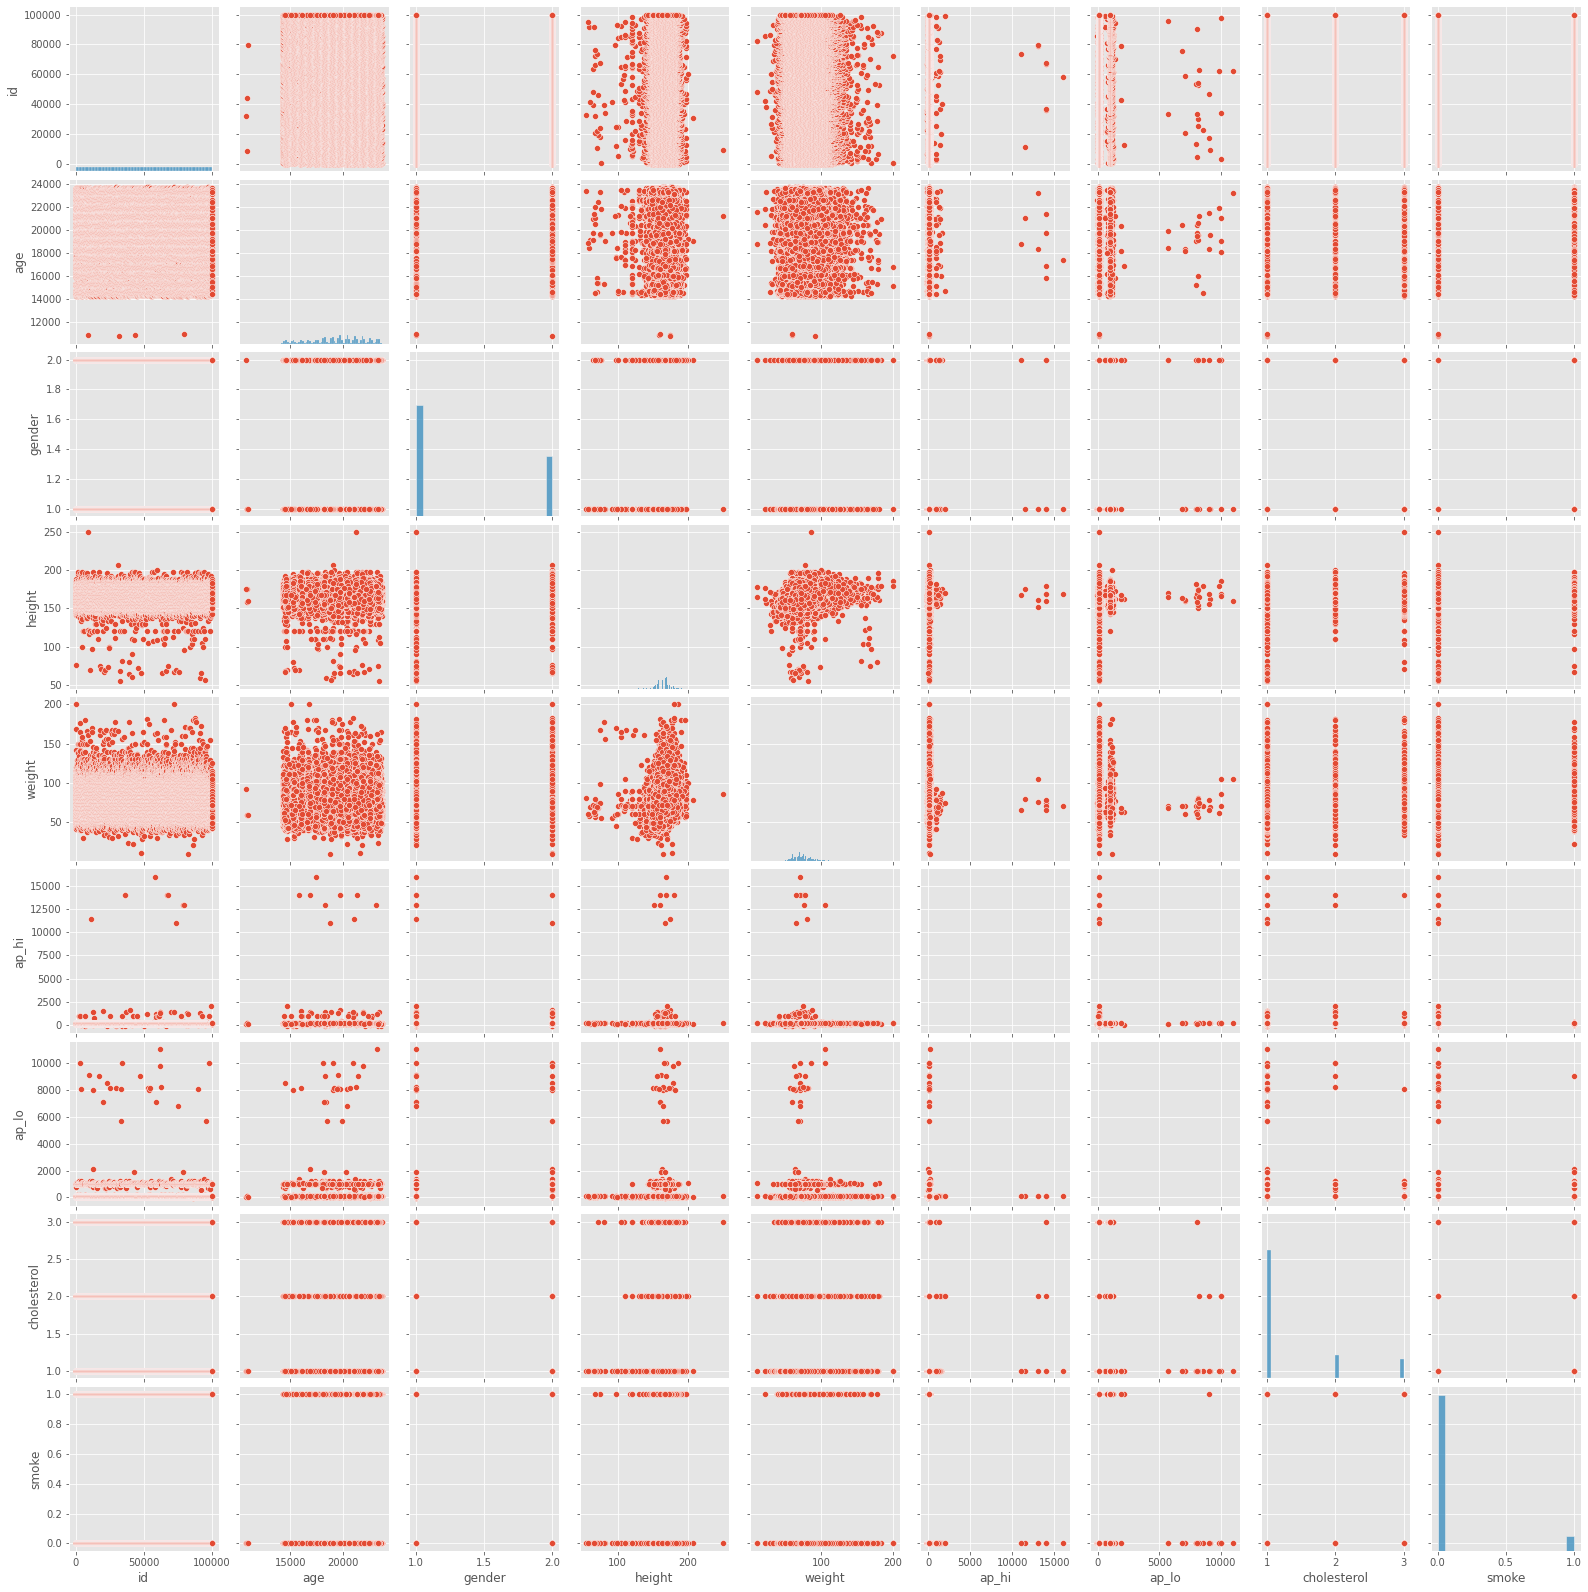

In [211]:
sns.pairplot(df_cardio_base)

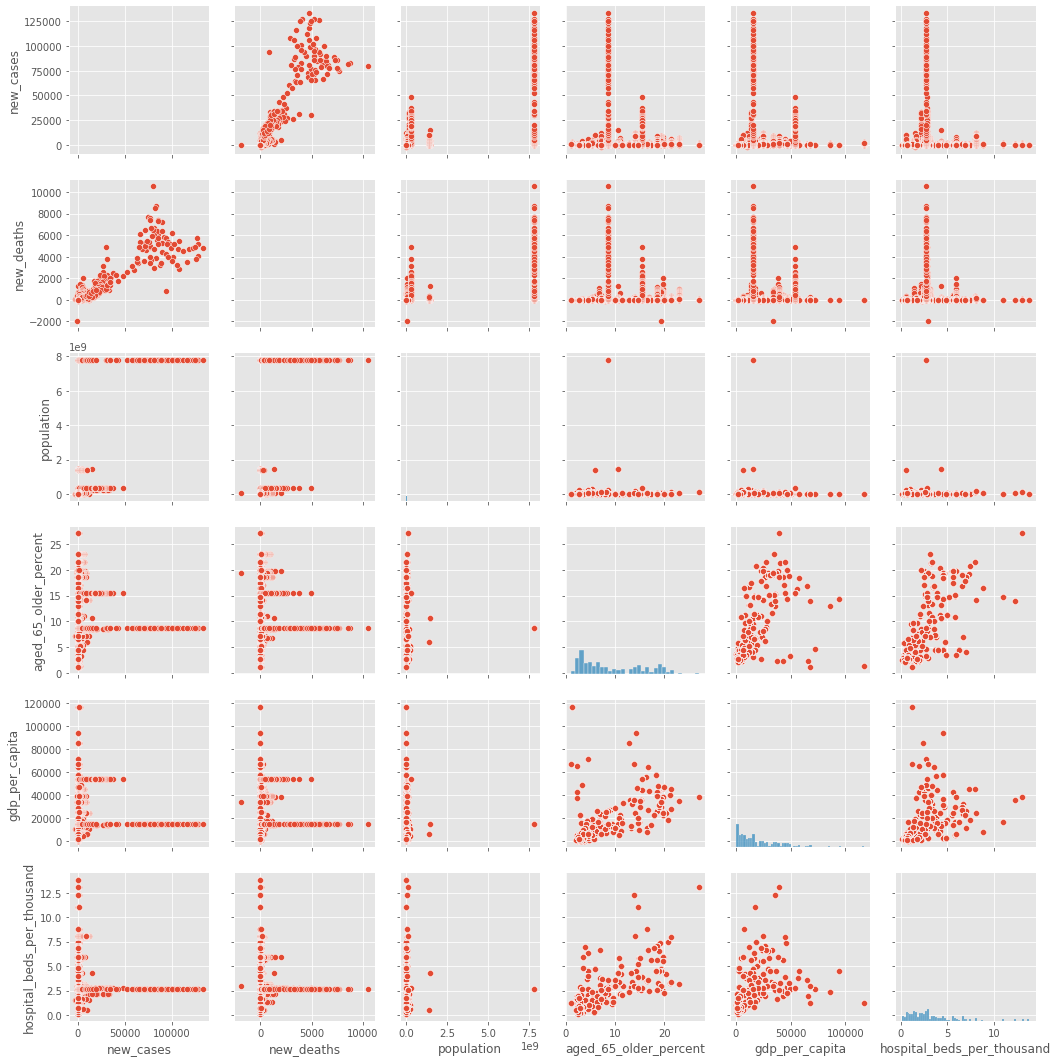

In [147]:
sns.pairplot(df_covid_data)

In [99]:
cardio_corr_matrix=df_cardio_base.corr().round(2)
cardio_corr_matrix

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,1.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.010,-0.000
age,0.000,1.000,-0.020,-0.080,0.050,0.020,0.020,0.150,-0.050
gender,0.000,-0.020,1.000,0.500,0.160,0.010,0.020,-0.040,0.340
height,-0.000,-0.080,0.500,1.000,0.290,0.010,0.010,-0.050,0.190
weight,-0.000,0.050,0.160,0.290,1.000,0.030,0.040,0.140,0.070
ap_hi,0.000,0.020,0.010,0.010,0.030,1.000,0.020,0.020,-0.000
ap_lo,-0.000,0.020,0.020,0.010,0.040,0.020,1.000,0.020,0.010
cholesterol,0.010,0.150,-0.040,-0.050,0.140,0.020,0.020,1.000,0.010
smoke,-0.000,-0.050,0.340,0.190,0.070,-0.000,0.010,0.010,1.000


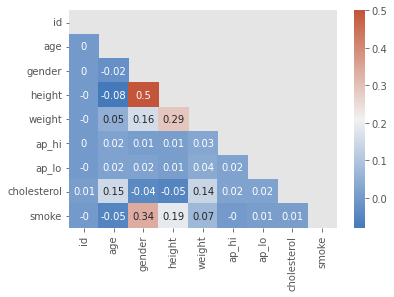

In [113]:
mask = np.triu(np.ones_like(cardio_corr_matrix, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(250, 20, as_cmap=True)
#
# Configure a custom diverging colormap
#
sns.heatmap(cardio_corr_matrix, annot=True, mask = mask, cmap=cmap)

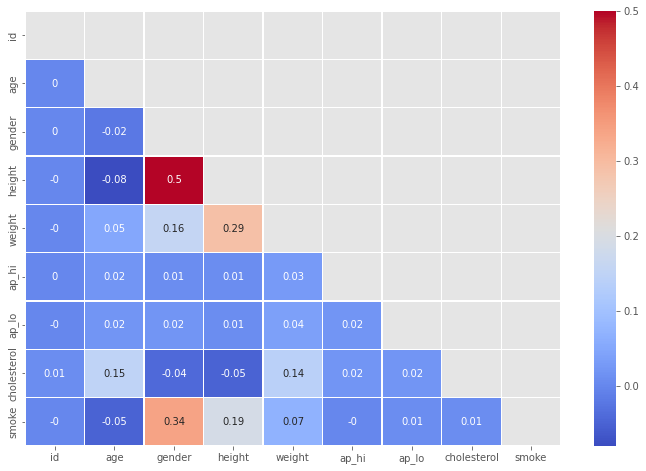

In [149]:
fig, ax = plt.subplots(figsize=(12,8))         # Sample figsize in inches
mask = np.triu(np.ones_like(cardio_corr_matrix, dtype=bool))
sns.heatmap(cardio_corr_matrix, annot=True, mask = mask, cmap='coolwarm', linewidths=.5, ax=ax)

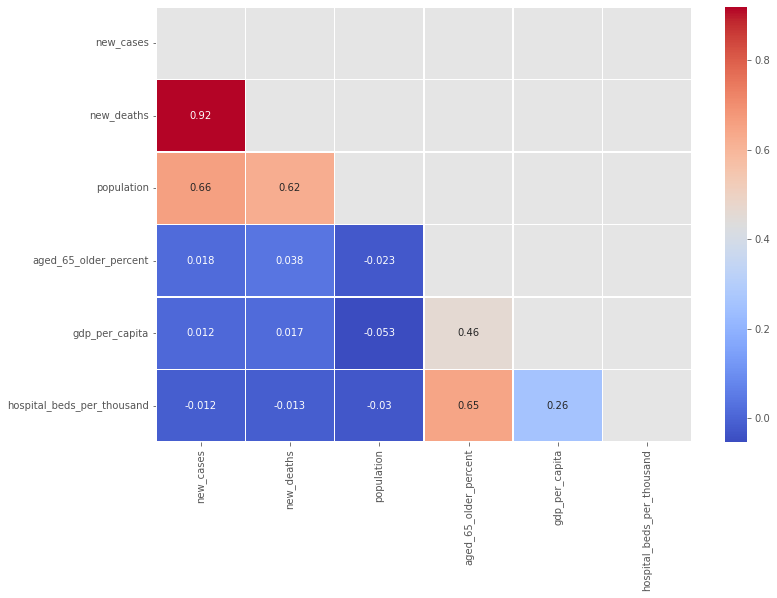

In [150]:
covid_data_matrix=df_covid_data.corr()
fig, ax = plt.subplots(figsize=(12,8))         # Sample figsize in inches
mask = np.triu(np.ones_like(covid_data_matrix, dtype=bool))
sns.heatmap(covid_data_matrix, annot=True, mask = mask, cmap='coolwarm', linewidths=.5, ax=ax)

## Which country has more cases of Covid?

In [218]:
df_covid_data[['location','new_cases','new_deaths']].groupby(['location']).sum().sort_values(by=['new_cases','new_deaths'])

,new_cases,new_deaths
location,,
Hong Kong,0,0
Anguilla,3,0
Lesotho,4,0
Bonaire Sint Eustatius and Saba,7,0
Papua New Guinea,8,0
...,...,...
United Kingdom,289140,40883
Russia,485253,6141
Brazil,739503,38406


## Which country has more deaths by Covid?

In [219]:
df_covid_data[['location','new_cases','new_deaths']].groupby(['location']).sum().sort_values(by=['new_deaths','new_cases'])

,new_cases,new_deaths
location,,
Hong Kong,0,0
Anguilla,3,0
Lesotho,4,0
Bonaire Sint Eustatius and Saba,7,0
Papua New Guinea,8,0
...,...,...
Italy,235561,34043
Brazil,739503,38406
United Kingdom,289140,40883


In [235]:
smokers=df_cardio_base[df_cardio_base['smoke']==1][['ap_hi','ap_lo']]
non_smokers=df_cardio_base[df_cardio_base['smoke']==0][['ap_hi','ap_lo']]

In [240]:
ttest,p_value = stats.mannwhitneyu(smokers,non_smokers)
p_value

array([1.95224535e-14, 4.38067742e-12])

In [246]:
if p_value.all() <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


In [ ]:
df_covid_data=df_covid_data.set_index(['date2'])

In [284]:
filter=df_covid_data['location']=='Italy'
df_a=df_covid_data[filter].loc['2020-02-28':'2020-03-20']
df_a

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
date2,,,,,,,,
2020-02-28,Italy,2020-02-28,250,5,60461828.000,23.021,35220.084,3.180
2020-02-29,Italy,2020-02-29,238,4,60461828.000,23.021,35220.084,3.180
2020-03-01,Italy,2020-03-01,240,8,60461828.000,23.021,35220.084,3.180
2020-03-02,Italy,2020-03-02,561,6,60461828.000,23.021,35220.084,3.180
2020-03-03,Italy,2020-03-03,347,17,60461828.000,23.021,35220.084,3.180
2020-03-04,Italy,2020-03-04,466,28,60461828.000,23.021,35220.084,3.180
2020-03-05,Italy,2020-03-05,587,27,60461828.000,23.021,35220.084,3.180
2020-03-06,Italy,2020-03-06,769,41,60461828.000,23.021,35220.084,3.180
2020-03-07,Italy,2020-03-07,778,49,60461828.000,23.021,35220.084,3.180


In [295]:
x= np.arange(1, df_a.shape[0]+1)
y=df_a['new_cases']
p = np.polyfit(x, np.log(y), 1)
p

array([0.15253375, 5.34823158])

In [296]:
list(map(float, p))


[0.15253374563372374, 5.348231582496631]

This polynomial can now be converted back into an exponential:



In [294]:
# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x), np.max(x), df_a.shape[0])
y_fitted = a * np.exp(b * x_fitted)

<ipython-input-294-77e8f1a83c05>:5: RuntimeWarning: overflow encountered in exp
  y_fitted = a * np.exp(b * x_fitted)


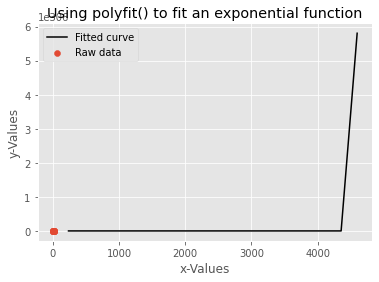

In [298]:
ax = plt.axes()
ax.scatter(x, y, label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')
ax.set_xlabel('x-Values')
ax.legend()

In [305]:
men=df_cardio_base[df_cardio_base['gender']==1]
women=df_cardio_base[df_cardio_base['gender']==2]

In [306]:
men['smoke'].value_counts()

0    44717
1      813
Name: smoke, dtype: int64

In [307]:
women['smoke'].value_counts()

0    19114
1     5356
Name: smoke, dtype: int64

In [308]:
5356/813

6.587945879458794

In [309]:
44717/19114

2.339489379512399

In [319]:
df_cardio_base[['age','weight']].groupby('age').mean()

,weight
age,
10798,92.000
10859,59.000
10878,59.000
10964,59.000
14275,105.000
...,...
23687,55.000
23690,63.000
23692,68.000


In [316]:
df_cardio_base[['age','weight']].groupby('age').mean().min()

weight   11.000
dtype: float64

In [317]:
df_cardio_base[['age','weight']].groupby('age').mean().max()

weight   165.000
dtype: float64

In [318]:
11/165

0.06666666666666667

In [323]:
Italy=df_covid_data[df_covid_data['location']=='Italy'][['date','new_cases']]
Germany=df_covid_data[df_covid_data['location']=='Germany'][['date','new_cases']]

In [340]:
Italy['total_cases']=Italy['new_cases'].cumsum()
Germany['total_cases']=Germany['new_cases'].cumsum()

In [341]:
Italy_Germany = Italy.merge(Germany, left_on='date', right_on='date')
Italy_Germany

,date,new_cases_x,total_cases_x,new_cases_y,total_cases_y
0,2019-12-31,0,0,0,0
1,2020-01-01,0,0,0,0
2,2020-01-02,0,0,0,0
3,2020-01-03,0,0,0,0
4,2020-01-04,0,0,0,0
...,...,...,...,...,...
158,2020-06-06,518,234531,407,183678
159,2020-06-07,270,234801,301,183979
160,2020-06-08,197,234998,214,184193
161,2020-06-09,280,235278,350,184543


In [342]:
Italy_Germany['diff']=Italy_Germany['total_cases_x']-Italy_Germany['total_cases_y']

In [344]:
Italy_Germany[Italy_Germany['diff']>10000].sort_values(by='date')

,date,new_cases_x,total_cases_x,new_cases_y,total_cases_y,diff
72,2020-03-12,2313,12462,271,1567,10895
73,2020-03-13,2651,15113,802,2369,12744
74,2020-03-14,2547,17660,693,3062,14598
75,2020-03-15,3497,21157,733,3795,17362
76,2020-03-16,2823,23980,1043,4838,19142
...,...,...,...,...,...,...
158,2020-06-06,518,234531,407,183678,50853
159,2020-06-07,270,234801,301,183979,50822
160,2020-06-08,197,234998,214,184193,50805
161,2020-06-09,280,235278,350,184543,50735


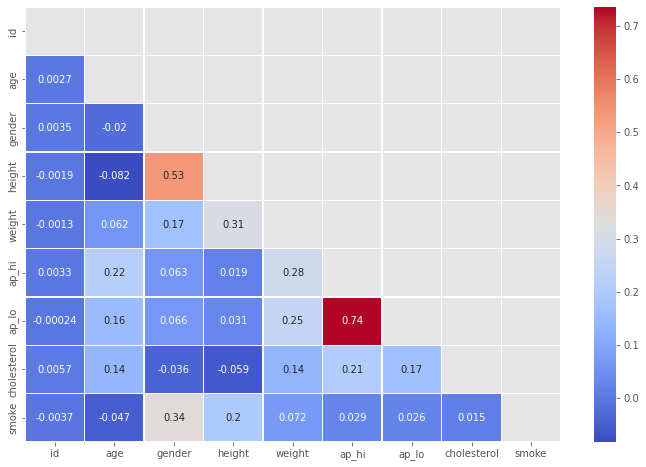

In [347]:
fig, ax = plt.subplots(figsize=(12,8))         # Sample figsize in inches
mask = np.triu(np.ones_like(df_cardio_base.corr(method='spearman'), dtype=bool))
sns.heatmap(df_cardio_base.corr(method='spearman'), annot=True, mask = mask, cmap='coolwarm', linewidths=.5, ax=ax)

In [348]:
df_covid_data['death_rate']=df_covid_data['new_deaths']/1000000
df_covid_data[['location','new_cases','new_deaths','death_rate']].groupby(['location']).sum().sort_values(by=['death_rate'])


,new_cases,new_deaths,death_rate
location,,,
Bonaire Sint Eustatius and Saba,7,0,0.000
Timor,24,0,0.000
French Polynesia,60,0,0.000
Namibia,31,0,0.000
Fiji,18,0,0.000
...,...,...,...
Italy,235561,34043,0.034
Brazil,739503,38406,0.038
United Kingdom,289140,40883,0.041


In [363]:
df_cardio_base.shape

(70000, 10)

In [364]:
df_cardio_base['rank'] = df_cardio_base['height'].rank( pct=True)
df_cardio_base.sort_values(by="height", ascending=False).head(700)
#df_cardio_base[['height']].value_counts().sort_index()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,rank
6486,9223,21220,1,250,86.000,140,100,3,0,1.000
21628,30894,19054,2,207,78.000,100,70,1,0,1.000
41901,59847,19187,2,200,100.000,170,1100,2,0,1.000
8897,12687,22497,2,198,79.000,160,100,1,1,1.000
30127,43083,23274,1,198,85.000,110,90,1,0,1.000
...,...,...,...,...,...,...,...,...,...,...
21182,30263,21972,2,184,75.000,140,90,1,0,0.990
59359,84757,23395,2,184,90.000,120,80,3,1,0.990
37162,53093,15969,1,184,80.000,130,80,1,0,0.990
69375,99097,20700,2,184,84.000,120,95,1,0,0.990


In [368]:
alcohol=df_cardio_alco.merge(df_cardio_base, left_on='id', right_on='id')

In [373]:
alcohol[ alcohol['alco']==1]

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,rank
30,81,1,20330,2,187,115.000,130,90,1,0,0.997
67,134,1,17363,1,167,71.000,120,80,2,0,0.622
69,136,1,18718,1,167,80.000,190,90,2,0,0.622
75,142,1,14499,2,164,48.000,110,70,1,1,0.468
102,180,1,21473,2,174,90.000,140,80,1,1,0.884
...,...,...,...,...,...,...,...,...,...,...,...
56845,99858,1,19475,2,171,65.000,120,80,1,1,0.819
56851,99864,1,21883,2,178,102.000,150,100,1,0,0.952
56861,99882,1,23281,1,164,98.000,140,90,2,0,0.468
56886,99933,1,19137,2,167,74.000,130,80,1,1,0.622


In [387]:
alcohol['age_years'] = (alcohol['age'] / 365.25).astype(int)

In [388]:
filter=(alcohol['alco']==1) & (alcohol['age_years'] > 50)
alcohol[ filter ]

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,rank,age_years
30,81,1,20330,2,187,115.000,130,90,1,0,0.997,55
69,136,1,18718,1,167,80.000,190,90,2,0,0.622,51
102,180,1,21473,2,174,90.000,140,80,1,1,0.884,58
173,318,1,23376,2,175,75.000,180,100,3,1,0.908,64
240,410,1,22415,2,173,70.000,130,70,2,1,0.865,61
...,...,...,...,...,...,...,...,...,...,...,...,...
56809,99799,1,19736,2,188,108.000,130,80,2,0,0.998,54
56845,99858,1,19475,2,171,65.000,120,80,1,1,0.819,53
56851,99864,1,21883,2,178,102.000,150,100,1,0,0.952,59
56861,99882,1,23281,1,164,98.000,140,90,2,0,0.468,63


In [389]:
1810 /df_cardio_alco.shape[0]

0.031808516246946555

In [391]:
df_cardio_base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,rank
count,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000
mean,49972.420,19468.866,1.350,164.359,74.206,128.817,96.630,1.367,0.088,0.500
std,28851.302,2467.252,0.477,8.210,14.396,154.011,188.473,0.680,0.283,0.288
min,0.000,10798.000,1.000,55.000,10.000,-150.000,-70.000,1.000,0.000,0.000
25%,25006.750,17664.000,1.000,159.000,65.000,120.000,80.000,1.000,0.000,0.250
50%,50001.500,19703.000,1.000,165.000,72.000,120.000,80.000,1.000,0.000,0.534
75%,74889.250,21327.000,2.000,170.000,82.000,140.000,90.000,2.000,0.000,0.776
max,99999.000,23713.000,2.000,250.000,200.000,16020.000,11000.000,3.000,1.000,1.000


In [392]:
b=	164.359+2*8.210	

In [393]:
a=	164.359-2*8.210	

In [397]:
filter=(df_cardio_base['height']>b) & (df_cardio_base['height']<a)
df_cardio_base[filter]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,rank


In [398]:
67665 /df_cardio_base.shape[0]

0.9666428571428571